# Упражнение №1 Работа с геометрическими объектами

[GITHUB](https://github.com/AutoGIS-2020/Exercise-1)

В первом наборе задач (1-2) вы определите свои собственные функции для обработки геометрических объектов. Во втором наборе задач (3-4) вы будете считывать данные из файла с помощью панд и создавать геометрии на основе информации о координатах во входных данных.


#### 1. Создание базовой геометрии:

###### Создайте функцию create_point_geom() с двумя параметрами (x_coord, y_coord). Функция должна создать фигурный точечный геометрический объект и вернуть его.

In [10]:
import os
from shapely.geometry import Point, LineString, Polygon

In [27]:
# функция создающая линии
def create_point_geom(x_coord, y_coord):
    """
        Функция создаёт фигурный точечный геометрический объект и возвращает его
    """
    # value1 -parameter
    assert type(x_coord) in [int, float], "Входное значение для 'x_coord' должно быть целым числом или числом с плавающей запятой! Нашел: %s" % type(x_coord)

    # value2 -parameter
    assert type(y_coord) in [int, float], "Входное значение для 'y_coord' должно быть целым числом или числом с плавающей запятой! Нашел: %s" % type(y_coord)

    #     create_point = 
    return Point(x_coord, y_coord)

Тип геометрии: Point
POINT (0 1.1)


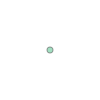

In [30]:
# Demonstrate the usage of the function create_point_geom
# point1 = create_point_geom('a', 1.1)
point1 = create_point_geom(0.0, 1.1)
print(f"Тип геометрии: {point1.geom_type}")
print(point1)
point1

##### Создайте функцию create_line_geom (), которая принимает список объектов Shapely Point в качестве параметра points и возвращает объект LineString этих входных точек. Кроме того, вы должны позаботиться о том, чтобы функция использовалась так, как она должна:

- Внутри функции вы должны сначала проверить с помощью ``assert-functionality``, что входные данные представляют собой список (см. Урок 6 из курса Geo-Python и подсказки для этого упражнения). Если для функции передается что-то другое, чем список, вы должны вернуть сообщение об ошибке: ``"Ввод должен быть списком!"``
- Вы также должны проверить с помощью assert, что входной список содержит по крайней мере два значения. Если нет, верните сообщение об ошибке: ``"Объект LineString требует как минимум двух точек!"``
- **Необязательно:** наконец, вы должны проверить с помощью ``assert``, что все значения во входном списке действительно являются точками формы. Если нет, верните сообщение об ошибке: ``"Все значения списка должны быть стройными точечными объектами!"``

In [13]:
# функция создающая линии
def create_line_geom (list_points):
    """
        Функция создаёт фигурный линейный геометрический объект и возвращает его
    """
    
    line_create = LineString(list_points)
    return line_create

Тип геометрии: LineString
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


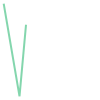

In [14]:
# Проверка
list_points1 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
list_p = create_line_geom(list_points1)
print(f"Тип геометрии: {list_p.geom_type}")
print(list_p)
list_p